In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
#Importing the income dataset
df = pd.read_csv ("census-income.data.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', 'capital-gain', 'capital-loss', "hours-per-week", "native-country", 'income'], sep=',\s',na_values=["?"],engine="python")

In [15]:
#Previewing the data
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
#Finding missing values (?) for each variables, manually, indiviudally. 
# df['age'].unique()
# df['workclass'].unique()
# df['fnlwgt'].unique()
df['education'].unique()
# df['education-num'].unique()
# df['marital-status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique()
# df['capital-gain'].unique()
# df['capital-loss'].unique()
# df['hours-per-week'].unique()
# df['native-country'].unique()
# df['income'].unique()



array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [ ]:
missing_values = df.isnull().sum()
print("missing_values:")
print(missing_values)

df = df.dropna()

In [7]:
missing_values = df.isnull().sum()
print("missing_values:")
print(missing_values)

missing_values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
#looking at the datatype
print(df.info())

#have to transform the variables for regression

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
df['workclass'] = lab_enc.fit_transform(df['workclass'])
df['education'] = lab_enc.fit_transform(df['education'])
df['marital-status'] = lab_enc.fit_transform(df['marital-status'])
df['occupation'] = lab_enc.fit_transform(df['occupation'])
df['relationship'] = lab_enc.fit_transform(df['relationship'])
df['race'] = lab_enc.fit_transform(df['race'])
df['sex'] = lab_enc.fit_transform(df['sex'])
df['native-country'] = lab_enc.fit_transform(df['native-country'])


In [19]:
print(df['income'].value_counts())
#  # <=50K    24720
#  # >50K      7841

#Encoding for label. If <=50k then 0 else 1
label_info = {'<=50K':0, '>50K':1}
df['income'] = df['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", df['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64
After encoding income
0    24720
1     7841
Name: count, dtype: int64


In [10]:
#Ensuring the labelencoder encoded properly
df['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [20]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [48]:
#Selecting features and splitting the datasets into features and label
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

x = df[selected_features] #feature
y = df.income #label

In [49]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=7)

In [74]:
#Logistic Regression
#Source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python?irclickid=XPG32xUYdxyPWbHWdp29132wUkFSTqSZwQmx3c0&irgwc=1&im_rewards=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow

#setting a seed
model1 = LogisticRegression(max_iter=1000,random_state=7)

#fitting the model using our data
model1.fit(x_train, y_train)

#predicting on the test data.
y_pred = model1.predict(x_test)

In [81]:
#Exporting prediction results to csv
prediction = pd.DataFrame(y_pred, columns=['logistic_predictions'])

prediction.to_csv('LogisticPredictionTrain.csv', index= False)


In [51]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [52]:
#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

array([[5215,  396],
       [1103,  827]], dtype=int64)

In [53]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test, y_pred, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.83      0.93      0.87      5611
        >50k       0.68      0.43      0.52      1930

    accuracy                           0.80      7541
   macro avg       0.75      0.68      0.70      7541
weighted avg       0.79      0.80      0.78      7541



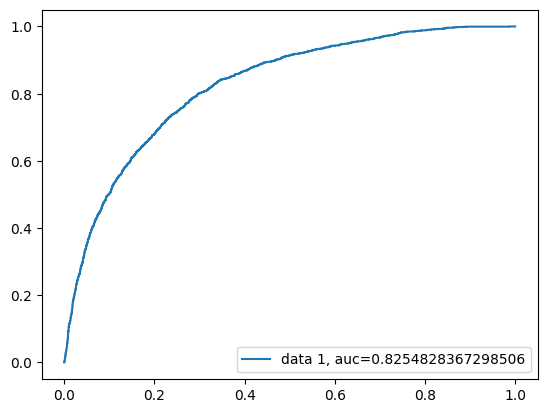

In [54]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
#now checking from the test data
test = pd.read_csv ("census-income.test.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', 'capital-gain', 'capital-loss', "hours-per-week", "native-country", 'income'])
test.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,,103497,Some-college,10,Never-married,,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,,227026,HS-grad,9,Never-married,,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [60]:
#Finding missing values (?) for each variables, manually, indiviudally. 
# df['age'].unique()
# df['workclass'].unique()
# df['fnlwgt'].unique()
# df['education'].unique()
# df['education_num'].unique()
# df['marital_status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique()
# df['capital_gain'].unique()
# df['capital_loss'].unique()
# df['hours_per_week'].unique()
# df['native_country'].unique()
# df['income'].unique()
#converting ? to nan
test[test==' ']= np.nan

test.head(15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [62]:
##Dropping all the missing values
#Removing all missing values
test = test.dropna()
missing_values = test.isnull().sum()
print("missing_values:")
print(missing_values)

missing_values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [63]:
test.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


In [64]:
#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
test['workclass'] = lab_enc.fit_transform(test['workclass'])
test['education'] = lab_enc.fit_transform(test['education'])
test['marital-status'] = lab_enc.fit_transform(test['marital-status'])
test['occupation'] = lab_enc.fit_transform(test['occupation'])
test['relationship'] = lab_enc.fit_transform(test['relationship'])
test['race'] = lab_enc.fit_transform(test['race'])
test['sex'] = lab_enc.fit_transform(test['sex'])
test['native-country'] = lab_enc.fit_transform(test['native-country'])

In [65]:
test.head()

#? got converted to zero

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,<=50K.
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,<=50K.
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,>50K.
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,>50K.
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,<=50K.


In [66]:
test['income'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [67]:
print(test['income'].value_counts())

#Encoding for label. If <=50k then 0 else 1
label_info = {' <=50K.':0, ' >50K.':1}
test['income'] = test['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", test['income'].value_counts())

income
 <=50K.    11360
 >50K.      3700
Name: count, dtype: int64
After encoding income
0    11360
1     3700
Name: count, dtype: int64


In [68]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [82]:
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

#from the real test data
x_test_real = test[selected_features]
y_test_real = test.income

y_pred_real = model1.predict(x_test_real)


#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test_real, y_pred_real)
confusion_mat

array([[10510,   850],
       [ 2203,  1497]], dtype=int64)

In [86]:
#Exporting Logistic Regression Prediction results to csv
#Exporting prediction results to csv
prediction = pd.DataFrame(y_pred, columns=['logistic_predictions'])

prediction.to_csv('LogisticPredictionTest.csv', index= False)


In [70]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test_real, y_pred_real, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.83      0.93      0.87     11360
        >50k       0.64      0.40      0.50      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.66      0.68     15060
weighted avg       0.78      0.80      0.78     15060



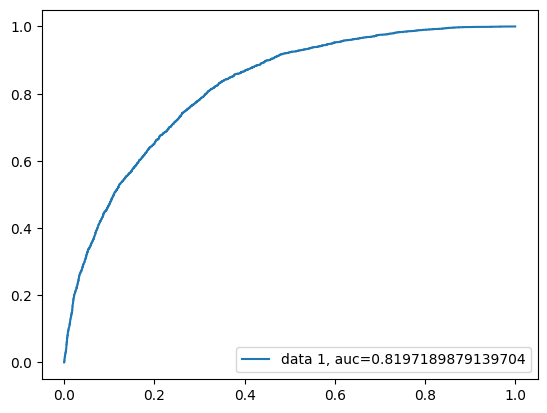

In [71]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability_real = model1.predict_proba(x_test_real)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_real, y_pred_probability_real)
auc = metrics.roc_auc_score(y_test_real, y_pred_probability_real)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [85]:
#! for notebook command, without ! it is cmd prompt command
!jupyter nbconvert --to script *.ipynb

[NbConvertApp] Converting notebook Income Project.ipynb to script
[NbConvertApp] Writing 8014 bytes to Income Project.py
